In [1]:
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
name = "123TCB_CB" # choose the name if you did not run the previous cells
    
dill.load_session('notebook_' + name + '.db')

tempdf = pickle.load(open('AlignmentDataFrames.p','rb'))

In [12]:
tempdf[name]['Alignment'] = AlignVec[0:len(tempdf[name]['GapSize'])]

adf = tempdf[name]

In [13]:
print(adf)

sortedadf = adf.sort_values('Alignment')
print('\n\nAnd the winner is...\n')
print(sortedadf)

#best = adf.loc[adf['Alignment'] == np.min(adf['Alignment'])]
#print('\n\nAnd the winner is...\n')
#print(best)
#minVec = np.array(adf['Alignment'])
#minVec = np.delete(minVec, np.where(minVec == np.min(minVec)))
#second = adf.loc[adf['Alignment'] == np.min(minVec)]
#print('\n\nSecond place to\n')
#print(second)

#minVec = np.delete(minVec, np.where(minVec == np.min(minVec)))
#third = adf.loc[adf['Alignment'] == np.min(minVec)]
#print('\n\nThird place to\n')
#print(third)

   GapSize  InkAmount  Speed  Alignment
0       30         50    0.1   0.415425
1       30         50    0.1   0.596229
2       15         50    0.1   0.593643
3       15         50    0.1   0.471050
4       15         75    0.1   0.487645
5       15         75    0.1   0.547964
6       15         75    1.0   0.613957
7       15         75    0.1   0.721350
8       15         75    0.1   0.765718


And the winner is...

   GapSize  InkAmount  Speed  Alignment
0       30         50    0.1   0.415425
3       15         50    0.1   0.471050
4       15         75    0.1   0.487645
5       15         75    0.1   0.547964
2       15         50    0.1   0.593643
1       30         50    0.1   0.596229
6       15         75    1.0   0.613957
7       15         75    0.1   0.721350
8       15         75    0.1   0.765718


In [2]:
namesVec = ['1245TCB_CB', '135TBB_CB', '123TCB_CB', '1234TCB_CB', 'HMB_CB']
DF = pd.DataFrame()

for name in namesVec:
    dill.load_session('notebook_' + name + '.db')
    tempdf = pickle.load(open('AlignmentDataFrames.p','rb'))
    tempdf[name]['Alignment'] = AlignVec[0:len(tempdf[name]['GapSize'])]
    adf = tempdf[name]
    
    best = adf.loc[adf['Alignment'] == np.min(adf['Alignment'])]
    best['Name'] = name
    DF = DF.append(best, ignore_index=True)
    
    minVec = np.array(adf['Alignment'])
    minVec = np.delete(minVec, np.where(minVec == np.min(minVec)))
    second = adf.loc[adf['Alignment'] == np.min(minVec)]
    second['Name'] = name
    DF = DF.append(second, ignore_index=True)

#DF = DF.set_index('Name')
print(DF)
    

FileNotFoundError: [Errno 2] No such file or directory: 'notebook_1245TCB_CB.db'

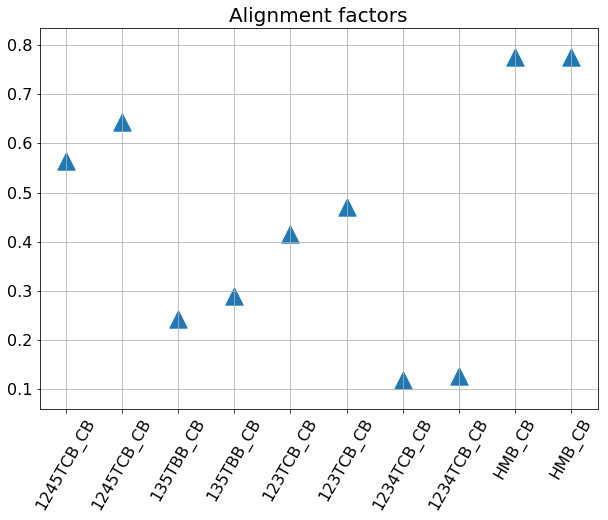

In [60]:
plt.figure(figsize=(10,7))
plt.scatter(DF.index.values, DF['Alignment'],  marker='^', s=300)
my_xticks = DF['Name']
plt.xticks(DF.index.values, my_xticks, rotation=60, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Alignment factors', fontsize=20)
plt.grid()
plt.savefig('AlignFactor1.png')
plt.show()
